In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 
```sh
conda install pandas
pip3 install pandas
```

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


# Creation of [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) 

In [3]:
dates = pd.date_range('20130101', periods=8)
pd.DataFrame(np.random.randn(8,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2013-01-01,0.669345,0.610430,0.420639,-1.534568
2013-01-02,-1.882852,0.808644,-0.299125,0.571750
2013-01-03,-0.427104,0.748239,-0.871061,-1.857748
2013-01-04,-0.176428,-0.704049,1.605025,0.949460
2013-01-05,0.843506,-0.406957,2.233189,0.200154
2013-01-06,0.005941,-1.564676,1.132137,-1.411992
2013-01-07,-1.092924,-0.519532,-0.044039,-0.555165
2013-01-08,-0.973097,0.037770,-0.036566,0.917868


In [4]:
pd.DataFrame({'A' : 1.,
              'B' : pd.Timestamp('20180620'),
              'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.arange(4,dtype='int32'),
              'E' : pd.Categorical(["test","train","test","train"]),
              'F' : 'foo' ,
              'G' : [ 3*n+1 for n in range(4)]})


,A,B,C,D,E,F,G
0,1.0,2018-06-20,1.0,0,test,foo,1
1,1.0,2018-06-20,1.0,1,train,foo,4
2,1.0,2018-06-20,1.0,2,test,foo,7
3,1.0,2018-06-20,1.0,3,train,foo,10


# Load Data from CSV File

In [55]:
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
french_cities = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
french_cities

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE


# Viewing Data

In [56]:
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [57]:
french_cities.tail()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Index

In [58]:
french_cities.index

Index(['Bordeaux', 'Brest', 'Clermont', 'Grenoble', 'Lille', 'Lyon',
       'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris', 'Rennes',
       'Strasbourg', 'Toulouse', 'Vichy'],
      dtype='object')

We can rename an index by setting its name.

In [59]:
french_cities.index.name = "City"
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


# Exercise 
## Translate DataFrame names in English

In [60]:
french_cities.rename(columns={'Moye':'Mean'}, inplace=True)
french_cities.rename(columns={'Région':'Region'}, inplace=True)

In [61]:
import locale, calendar

locale.setlocale(locale.LC_ALL,'en_US')
months = list(calendar.month_abbr[1:])
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [62]:
french_cities.rename(
  columns={ old : new 
           for old, new in zip(french_cities.columns[:12], months)
           if old != new }, inplace=True)
french_cities.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Lati', 'Long', 'Mean', 'Ampl', 'Region'],
      dtype='object')

In [63]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO


# Indexing on DataFrames

In [64]:
french_cities['Lati']  # DF [] accesses columns (Series)

City
Bordeaux       44.50
Brest          48.24
Clermont       45.47
Grenoble       45.10
Lille          50.38
Lyon           45.45
Marseille      43.18
Montpellier    43.36
Nantes         47.13
Nice           43.42
Paris          48.52
Rennes         48.05
Strasbourg     48.35
Toulouse       43.36
Vichy          46.08
Name: Lati, dtype: float64

In [65]:
french_cities.Lati

City
Bordeaux       44.50
Brest          48.24
Clermont       45.47
Grenoble       45.10
Lille          50.38
Lyon           45.45
Marseille      43.18
Montpellier    43.36
Nantes         47.13
Nice           43.42
Paris          48.52
Rennes         48.05
Strasbourg     48.35
Toulouse       43.36
Vichy          46.08
Name: Lati, dtype: float64

In [66]:
french_cities.values[:,12]

array([44.5, 48.24, 45.47, 45.1, 50.38, 45.45, 43.18, 43.36, 47.13, 43.42,
       48.52, 48.05, 48.35, 43.36, 46.08], dtype=object)

`.loc` and `.iloc` allow to access individual values, slices or masked selections:

In [67]:
french_cities.loc['Rennes', "Jun"]

16.2

In [68]:
french_cities.iloc[-4, 5]

16.2

In [69]:
french_cities.loc['Rennes', ["Jul", "Aug"]]

Jul    17.9
Aug    17.8
Name: Rennes, dtype: object

In [70]:
french_cities.iloc[-4, [6,7]]

Jul    17.9
Aug    17.8
Name: Rennes, dtype: object

In [71]:
french_cities.loc['Rennes', "Sep":"Dec"]

Sep    15.7
Oct    11.6
Nov     7.8
Dec     5.4
Name: Rennes, dtype: object

In [72]:
french_cities.iloc[-4, 8:12]

Sep    15.7
Oct    11.6
Nov     7.8
Dec     5.4
Name: Rennes, dtype: object

# Masking

In [73]:
mask = french_cities.Mean > 12
mask

City
Bordeaux        True
Brest          False
Clermont       False
Grenoble       False
Lille          False
Lyon           False
Marseille       True
Montpellier     True
Nantes         False
Nice            True
Paris          False
Rennes         False
Strasbourg     False
Toulouse        True
Vichy          False
Name: Mean, dtype: bool

In [74]:
french_cities[mask]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO


In [75]:
french_cities.loc[mask]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO


In [76]:
french_cities.iloc[mask.values]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO


In [77]:
french_cities[french_cities.Region == 'NO']

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO


In [78]:
french_cities.loc[(french_cities.Region == 'NO') | (french_cities.Region == 'SO')]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO


# New column


In [79]:
french_cities["std"] = french_cities.iloc[:,:12].std(axis=1)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region,std
City,,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO,5.792681
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO,3.773673
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE,6.189795
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE,6.770771
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE,5.550648
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE,6.823017
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE,6.480928
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE,6.247102
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO,5.254342


In [80]:
french_cities = french_cities.drop("std", axis=1) # remove this new column

In [81]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO


# Modifying a dataframe with multiple indexing

In [82]:
# french_cities['Rennes']['Sep'] = 25 # It does not works and breaks the DataFrame
french_cities.loc['Rennes']['Jun'] # = 25 is the right way to do it

16.2

In [83]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO


# Transforming datasets

In [84]:
french_cities['Mean'].min(), french_cities['Ampl'].max()

(9.72, 18.6)

## Apply

Let's convert the temperature mean from Celsius to Fahrenheit degree.

In [85]:
fahrenheit = lambda T: T*9/5+32
french_cities['Mean'].apply(fahrenheit)

City
Bordeaux       55.994
Brest          51.386
Clermont       51.692
Grenoble       51.764
Lille          49.514
Lyon           52.448
Marseille      57.614
Montpellier    57.002
Nantes         53.042
Nice           58.712
Paris          52.124
Rennes         52.034
Strasbourg     49.496
Toulouse       54.824
Vichy          51.296
Name: Mean, dtype: float64

## Sort

In [86]:
french_cities.sort_values(by='Lati')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


In [87]:
french_cities = french_cities.sort_values(by='Lati',ascending=False)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Region
City,,,,,,,,,,,,,,,,,
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE


## Stack and unstack

Instead of seeing the months along the axis 1, and the cities along the axis 0, let's try to convert these into an outer and an inner axis along only 1 time dimension.

In [88]:
pd.set_option("display.max_rows", 20)
unstacked = french_cities.iloc[:,:12].unstack()
unstacked

     City       
Jan  Lille          2.4
     Paris          3.4
     Strasbourg     0.4
     Brest          6.1
     Rennes         4.8
     Nantes         5.0
     Vichy          2.4
     Clermont       2.6
     Lyon           2.1
     Grenoble       1.5
                   ... 
Dec  Nantes         5.5
     Vichy          3.4
     Clermont       3.6
     Lyon           3.1
     Grenoble       2.3
     Bordeaux       6.2
     Nice           8.2
     Montpellier    6.5
     Toulouse       5.5
     Marseille      6.9
Length: 180, dtype: float64

In [89]:
type(unstacked)

pandas.core.series.Series

## Transpose

The result is grouped in the wrong order since it sorts first the axis that was unstacked. We need to transpose the dataframe.

In [90]:
city_temp = french_cities.iloc[:,:12].transpose()
city_temp

City,Lille,Paris,Strasbourg,Brest,Rennes,Nantes,Vichy,Clermont,Lyon,Grenoble,Bordeaux,Nice,Montpellier,Toulouse,Marseille
Jan,2.4,3.4,0.4,6.1,4.8,5.0,2.4,2.6,2.1,1.5,5.6,7.5,5.6,4.7,5.5
Feb,2.9,4.1,1.5,5.8,5.3,5.3,3.4,3.7,3.3,3.2,6.6,8.5,6.7,5.6,6.6
Mar,6.0,7.6,5.6,7.8,7.9,8.4,7.1,7.5,7.7,7.7,10.3,10.8,9.9,9.2,10.0
Apr,8.9,10.7,9.8,9.2,10.1,10.8,9.9,10.3,10.9,10.6,12.8,13.3,12.8,11.6,13.0
May,12.4,14.3,14.0,11.6,13.1,13.9,13.6,13.8,14.9,14.5,15.8,16.7,16.2,14.9,16.8
Jun,15.3,17.5,17.2,14.4,16.2,17.2,17.1,17.3,18.5,17.8,19.3,20.1,20.1,18.7,20.8
Jul,17.1,19.1,19.0,15.6,17.9,18.8,19.3,19.4,20.7,20.1,20.9,22.7,22.7,20.9,23.3
Aug,17.1,18.7,18.3,16.0,17.8,18.6,18.8,19.1,20.1,19.5,21.0,22.5,22.3,20.9,22.8
Sep,14.7,16.0,15.1,14.7,15.7,16.4,16.0,16.2,16.9,16.7,18.6,20.3,19.3,18.3,19.9
Oct,10.4,11.4,9.5,12.0,11.6,12.2,11.0,11.2,11.4,11.4,13.8,16.0,14.6,13.3,15.0


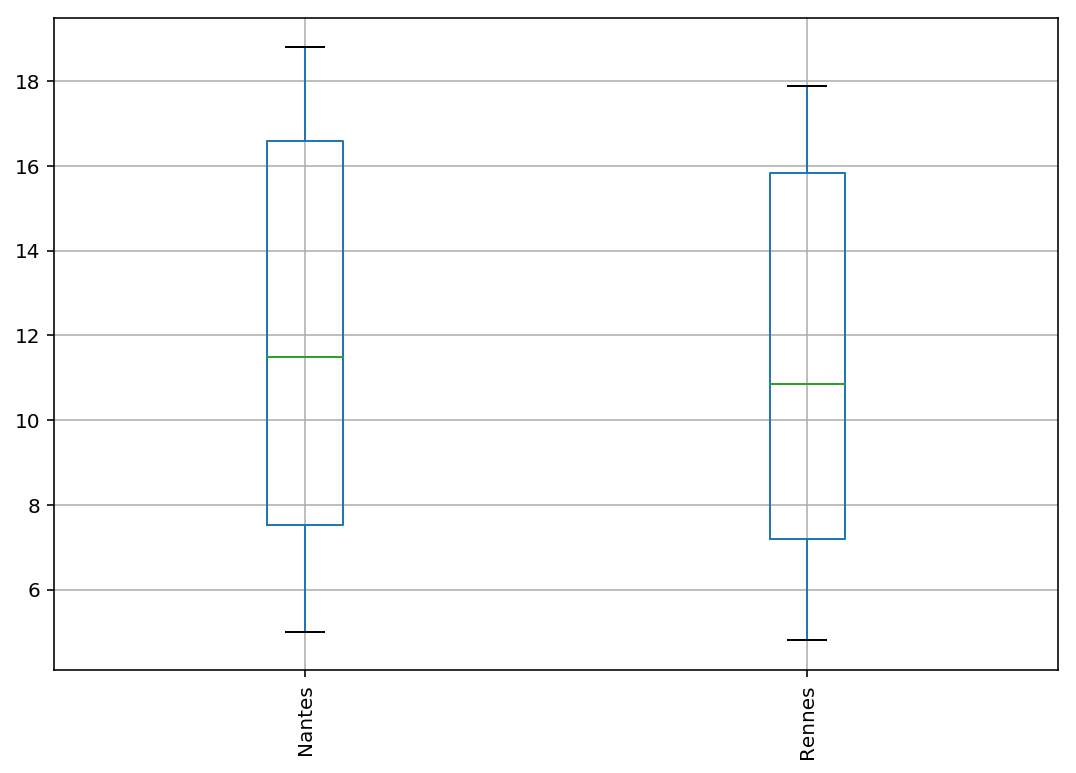

In [91]:
city_temp[['Nantes','Rennes']].boxplot(rot=90);

# Describing

In [92]:
french_cities['Region'].describe()

count     15
unique     4
top       SE
freq       7
Name: Region, dtype: object

In [93]:
french_cities['Region'].unique()

array(['NE', 'NO', 'SE', 'SO'], dtype=object)

In [94]:
french_cities['Region'].value_counts()

SE    7
NE    3
NO    3
SO    2
Name: Region, dtype: int64

In [95]:
french_cities.Region.dtypes

dtype('O')

In [96]:
french_cities["Region"].memory_usage()

880

In [97]:
# To save memory, we can convert it to a categorical column:
french_cities["Region"] = french_cities["Region"].astype("category")
french_cities.Region.dtype

CategoricalDtype(categories=['NE', 'NO', 'SE', 'SO'], ordered=False)

In [98]:
french_cities["Region"].memory_usage()

967

# Data Aggregation/summarization

## groupby

In [99]:
fc_grouped_region = french_cities.groupby("Region")
type(fc_grouped_region)

pandas.core.groupby.groupby.DataFrameGroupBy

In [100]:
for group_name, subdf in fc_grouped_region:
    print(group_name)
    print(subdf)
    print("")

NE
            Jan  Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec  \
City                                                                            
Lille       2.4  2.9  6.0   8.9  12.4  15.3  17.1  17.1  14.7  10.4  6.1  3.5   
Paris       3.4  4.1  7.6  10.7  14.3  17.5  19.1  18.7  16.0  11.4  7.1  4.3   
Strasbourg  0.4  1.5  5.6   9.8  14.0  17.2  19.0  18.3  15.1   9.5  4.9  1.3   

             Lati  Long   Mean  Ampl Region  
City                                         
Lille       50.38  3.04   9.73  14.7     NE  
Paris       48.52  2.20  11.18  15.7     NE  
Strasbourg  48.35  7.45   9.72  18.6     NE  

NO
        Jan  Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec  \
City                                                                        
Brest   6.1  5.8  7.8   9.2  11.6  14.4  15.6  16.0  14.7  12.0  9.0  7.0   
Rennes  4.8  5.3  7.9  10.1  13.1  16.2  17.9  17.8  15.7  11.6  7.8  5.4   
Nantes  5.0  5.3  8.4  10.8  13.9  17.2  18.8  18

## Transferring R data sets into Python

In [101]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


- conversions of R to pandas objects will be done automatically

In [102]:
from rpy2.robjects import r
x = r('c(1,2,3,4)')
type(x)

numpy.ndarray

In [103]:
v = r('seq(1:10)')
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [104]:
from rpy2.robjects import pandas2ri

pandas2ri.activate()
r.library('missMDA')
r.data('orange')
orange = r('orange')

/opt/miniconda3/envs/math-python/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [105]:
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
4,NaN,6.166667,5.333333,4.083333,NaN,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,NaN,1.291667,4.333333
7,NaN,4.541667,4.833333,NaN,4.958333,2.916667,1.541667,3.958333
8,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000


In [106]:
%%R
library('missMDA')
data(orange)
estim_ncpPCA(orange)

$ncp
[1] 2

$criterion
        0         1         2         3         4         5 
1.0388714 0.9279948 0.5976727 0.7855501 2.0250470 2.6741735 



In [107]:
from rpy2.robjects.packages import importr

miss_mda = importr('missMDA')
res = miss_mda.imputePCA(orange,ncp=2)
orange_r = res[0]
orange_r.colnames

'Co...,'Od...,'At...,'Sw...,'Ac...,'Bi...,'Pu...,'Ty...


In [58]:
orange = pd.DataFrame(pandas2ri.ri2py(orange_r), 
                      columns=orange_r.colnames, 
                      index=orange_r.rownames)

orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
4,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
7,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
8,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


In [108]:
from rpy2.robjects import r
r('library(missMDA)')
r('df <- imputePCA(orange,ncp=2) ')
r('res <- as.data.frame(df$completeObs)')
orange = r('res')
orange

/opt/miniconda3/envs/math-python/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
4,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
7,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
8,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


# Load data from a local or remote HTML file
We can download and extract data about mean sea level stations around the world from the [PSMSL website](http://www.psmsl.org/).

In [110]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [111]:
# there is 1 table on that page which contains metadata about the stations where 
# sea levels are recorded
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,03/05/2018,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,06/06/2018,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,06/06/2018,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,29/06/2017,140,12
5,WISMAR 2,8,53.899,11.458,NaN,DEU,13/02/2018,120,22
6,MAASSLUIS,9,51.918,4.250,NaN,NLD,17/07/2017,150,61
7,SAN FRANCISCO,10,37.807,-122.465,158.0,USA,14/02/2018,823,31
8,WARNEMUNDE 2,11,54.170,12.103,NaN,DEU,13/12/2017,120,12
9,NEW YORK (THE BATTERY),12,40.700,-74.013,NaN,USA,14/02/2018,960,121


# Saving Work

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [112]:
with pd.HDFStore("../data/pandas_nb.h5") as writer:
    local_sea_level_stations.to_hdf(writer, "/sea_level/stations")

In [113]:
%ls ../data/*.h5

../data/pandas_nb.h5


# Reloading data

In [114]:
with pd.HDFStore("../data/pandas_nb.h5") as store:
    local_sea_level_stations = store["/sea_level/stations"]

In [115]:
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,03/05/2018,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,06/06/2018,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,06/06/2018,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,29/06/2017,140,12
5,WISMAR 2,8,53.899,11.458,NaN,DEU,13/02/2018,120,22
6,MAASSLUIS,9,51.918,4.250,NaN,NLD,17/07/2017,150,61
7,SAN FRANCISCO,10,37.807,-122.465,158.0,USA,14/02/2018,823,31
8,WARNEMUNDE 2,11,54.170,12.103,NaN,DEU,13/12/2017,120,12
9,NEW YORK (THE BATTERY),12,40.700,-74.013,NaN,USA,14/02/2018,960,121


# References

- [Pandas website](http://pandas.pydata.org).
- *Python for Data Analysis* by Wes McKinney ([O'Reilly Media](http://shop.oreilly.com/product/0636920023784.do)).
- [Analyzing and Manipulating Data with Pandas Beginner](https://youtu.be/6ohWS7J1hVA) | SciPy 2016 Tutorial | Jonathan Rocher.
- https://github.com/groverpr/learn_python_libraries
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
